# Rebound Solar System Practice

Create a simulation of the Milky Way's 4 giant planets, in addition to the sun, using rebound

## Build the sim

In [1]:
cd /Users/mariahjones/Desktop/Research/projects/Orbitals/

/Users/mariahjones/Desktop/Research/projects/Orbitals


In [1]:
import rebound
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sim = rebound.Simulation()
sim.integrator = "mercurius"
sim.ri_mercurius.L = "infinity"
sim.ri_mercurius.r_crit_hill = 3
sim.dt = 1

In [3]:
# Convert au/days to au/years
vel_x = [0.0, -6.584186332911239E-03,1.361833139322700E-03, -3.176609453266956E-03, 1.106505958060795E-04]
vel_y = [0.0, 4.208054867943963E-03, 5.314892732297496E-03, 2.188750863994737E-03, 3.160539398425530E-03]
vel_z = [0.0, 1.298323287693746E-04, -1.466946539551684E-04, 4.926573452085599E-05, -6.757068282993264E-05]

vel_x = np.array(vel_x) * 365.25636
vel_y = np.array(vel_y) * 365.25636
vel_z = np.array(vel_z) * 365.25636


# Convert mass to integration units
sol_mass = (2 * np.pi)**2 # integration units
sol_gm = (1.33E20) # real units

jup_gm = 1.27E17 
jup_mass = (jup_gm / sol_gm) * sol_mass


sat_gm = 3.79E16
sat_mass = (sat_gm / sol_gm) * sol_mass

ur_gm = 5.79E15 
ur_mass = (ur_gm / sol_gm) * sol_mass

nep_gm = 6.84E15
nep_mass = (nep_gm / sol_gm) * sol_mass


# add particles to the simulation

sim.add(m = sol_mass, x = 0, y = 0, z = 0,
        vx = vel_x[0], vy = vel_y[0], vz = vel_z[0], hash = 'Sun')
sim.add(m = jup_mass, x = 2.559959519433896E+00, y = 4.317254861986015E+00, z =-7.520814690745442E-02,
        vx= vel_x[1], vy= vel_y[1], vz= vel_z[1], hash = 'Jupiter')
sim.add(m = sat_mass, x = 9.241056053800349E+00, y =-2.909785985421069E+00, z =-3.171865429820031E-01,
        vx= vel_x[2], vy= vel_y[2], vz= vel_z[2], hash = 'Saturn')
sim.add(m = ur_mass, x = 1.178746554190535E+01, y = 1.564471912991385E+01, z =-9.472686043780910E-02,
        vx= vel_x[3], vy= vel_y[3], vz= vel_z[3], hash = 'Uranus')
sim.add(m = nep_mass, x = 2.986403735565160E+01, y =-1.304275085444185E+00, z =-6.613439117521470E-01,
        vx= vel_x[4], vy= vel_y[4], vz= vel_z[4], hash = 'Neptune')

#### Define a function to save and load in outputs

In [4]:
def save_orbits():
    '''
    save orbital elements to .txt files
    '''
    names = ['jupiter', 'saturn', 'uranus', 'neptune']
    orbits = sim.orbits()
    
    for i, orbit in enumerate(orbits):
        planet_name = names[i] if i < len(names) else f'unknown_{i}'
        with open(f'orbit_{planet_name}.txt', 'w') as file:
            file.write(str(orbit))
        print(orbit)

def read_files(num_files):
    '''
    read in orbital elements from .txt files
    '''
    orbits = []
    for i in range(num_files):
        with open(f'orbits_{i}.txt', 'r') as file:
            orbit = file.read()
            orbits.append(orbit)
    return orbits


#### Run it

In [9]:
Nout = 10000           # number of points to display
tmax = 3.e5         # let the simulation run for 80 years
Nplanets = 4

x = np.zeros((Nplanets,Nout))
a = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
longitude = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets, Nout))
f = np.zeros((Nplanets, Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.orbits()
    for j in range(Nplanets):
        x[j][i] = ps[j+1].x
        a[j][i] = os[j].a 
        ecc[j][i] = os[j].e
        longitude[j][i] = os[j].l
        Omega[j][i] = os[j].Omega
        omega[j][i] = os[j].omega
        inc[j][i] = os[j].inc
        f[j][i] = os[j].f

In [10]:
inc = (np.array(inc) * 180 / np.pi) # convert from radians to degrees

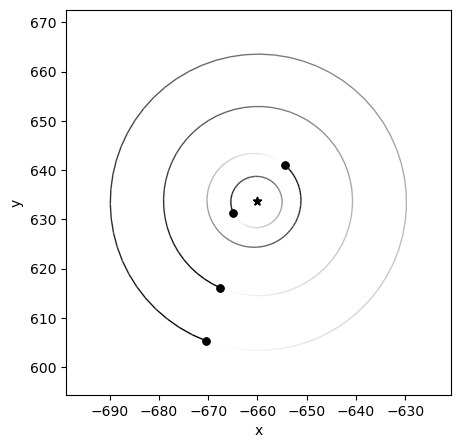

In [11]:
rebound.OrbitPlot(sim)
#save_orbits() # save orbits

## Plotting

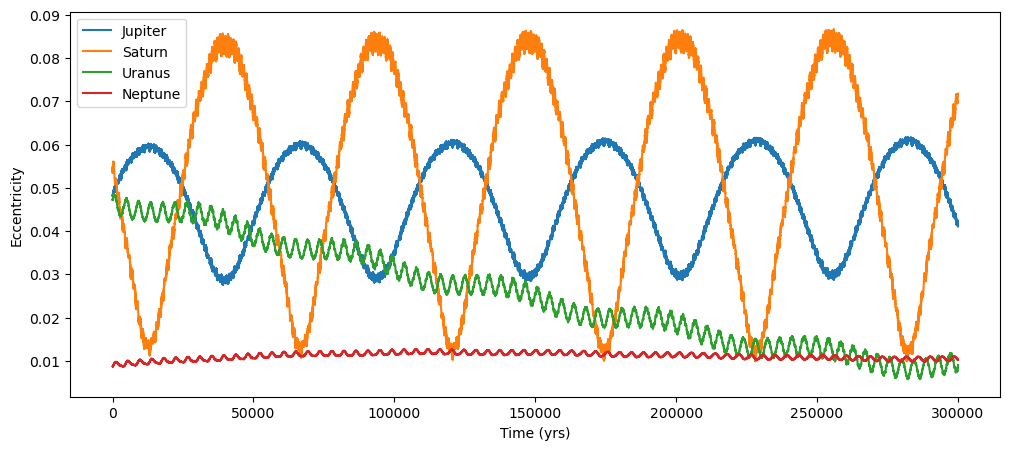

In [12]:
labels = ['Jupiter','Saturn','Uranus','Neptune']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[0])
plt.plot(times,ecc[1],label=labels[1])
plt.plot(times,ecc[2],label=labels[2])
plt.plot(times,ecc[3],label=labels[3])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Eccentricity")
#plt.savefig('eccentricities.png')
plt.legend();

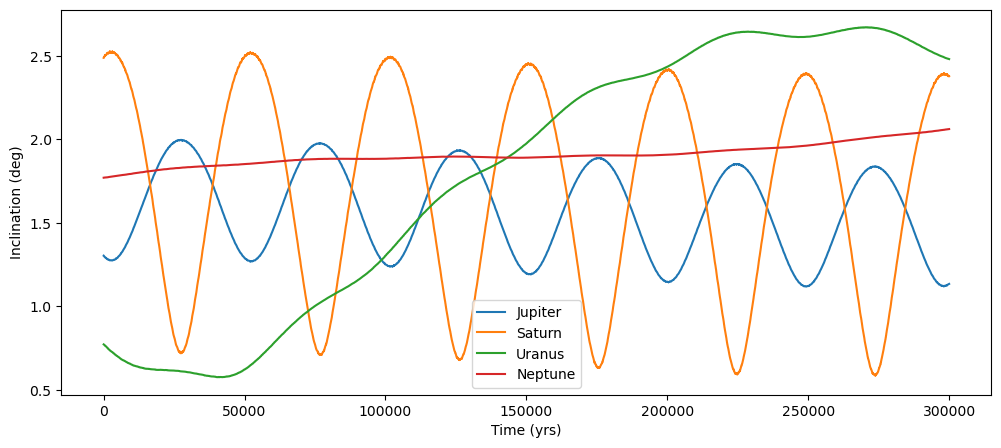

In [13]:
labels = ['Jupiter','Saturn','Uranus','Neptune']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,inc[0],label=labels[0])
plt.plot(times,inc[1],label=labels[1])
plt.plot(times,inc[2],label=labels[2])
plt.plot(times,inc[3],label=labels[3])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Inclination (deg)")
#plt.savefig('inclination.png')
plt.legend();

## Adding Lucy targets

Select 5 asteroid targets from JPL's Lucy spacecraft and add them to the simulation.

In [14]:
# Convert au/days to au/years
vel_x = np.append(vel_x, [-4.787910318140170E-03, -4.490752466622040E-03,-5.061566077016356E-03, -6.921978329380989E-03, 1.720201882234832E-03])
vel_y = np.append(vel_y, [-6.117250969489108E-03, -6.104130925957561E-03, -5.523543906600741E-03, -3.555983684565142E-03, 8.285673540333695E-03])
vel_z = np.append(vel_z, [-1.607348091112789E-04, -1.018925991237289E-04, -6.120420008003242E-04, -9.050671118572943E-04, 1.913885441042937E-03])

vel_x = np.array(vel_x) * 365.25636
vel_y = np.array(vel_y) * 365.25636
vel_z = np.array(vel_z) * 365.25636


# add particles to the simulation

sim.add(x = -4.201536524694033E+00, y = 2.718676637762465E+00, z = 6.884284956765065E-01,
        vx = vel_x[5], vy = vel_y[5], vz = vel_z[5], hash = 'Eurybates')

sim.add(x = -4.343695308089850E+00, y = 2.555361876963556E+00, z = 1.146716525792677E+00,
        vx= vel_x[6], vy= vel_y[6], vz= vel_z[6], hash = 'Polymele')

sim.add(x = -3.992103726537269E+00, y = 3.297493797829746E+00, z = -9.897818491470088E-01,
        vx= vel_x[7], vy= vel_y[7], vz= vel_z[7], hash = 'Leucus')

sim.add(x = -2.310266153292456E+00, y = 4.373182945338368E+00, z = -4.663571003849790E-01,
        vx= vel_x[8], vy= vel_y[8], vz= vel_z[8], hash = 'Orus')

sim.add(x = 4.224857377650168E+00, y = -5.904764895068263E-01, z = -1.368216676274054E+00,
        vx= vel_x[9], vy= vel_y[9], vz= vel_z[9], hash = 'Patroclus')

In [15]:
Nout = 10000            # number of points to display
tmax = 3.e5         # let the simulation run for 80 years
Nplanets = 9

a = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets, Nout))
f = np.zeros((Nplanets, Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.orbits()
    for j in range(Nplanets):
        a[j][i] = os[j].a 
        ecc[j][i] = os[j].e
        Omega[j][i] = os[j].Omega
        omega[j][i] = os[j].omega
        inc[j][i] = os[j].inc
        f[j][i] = os[j].f

In [16]:
inc = (np.array(inc) * 180 / np.pi) # convert from radians to degrees

In [17]:
print(sim.particles[1].a)
orbits = sim.orbits()
for orbit in orbits:
    print(orbit)

5.202707466024245
<rebound.Orbit instance, a=5.202707466024245 e=0.04108156627262762 inc=0.01979999275721165 Omega=1.9459889391392098 omega=5.08741907229736 f=2.839080859500532>
<rebound.Orbit instance, a=9.545368256282131 e=0.07197263607479837 inc=0.04150475116677179 Omega=1.7844110886544549 omega=4.210001661609409 f=1.234346352291153>
<rebound.Orbit instance, a=19.19806126728266 e=0.009071025212550913 inc=0.043291069119758156 Omega=1.6433108540552213 omega=1.769917596815377 f=0.8953631826452222>
<rebound.Orbit instance, a=30.067267500751047 e=0.010274626348147334 inc=0.035976936740481844 Omega=2.1204370813640905 omega=0.33687005771784406 f=1.9037507496838124>
<rebound.Orbit instance, a=-4.960567345847321 e=183.4877129796176 inc=3.1197857819428694 Omega=2.7990895480557003 omega=3.4614842198604565 f=0.10375297999636768>
<rebound.Orbit instance, a=-5.216407116794181 e=173.91757444225098 inc=3.126548064083376 Omega=2.972481538301049 omega=3.60486035209833 f=0.1339699780153163>
<rebound.O

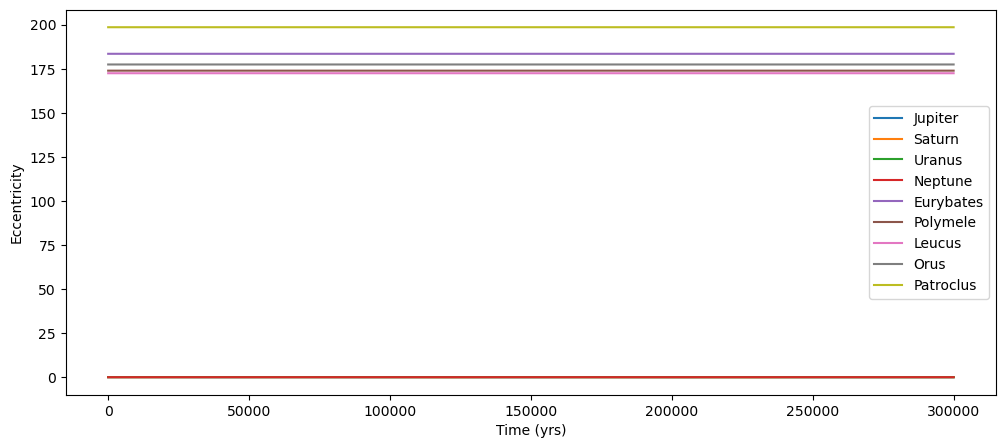

In [18]:
labels = ['Jupiter','Saturn','Uranus','Neptune', 'Eurybates', 'Polymele', 'Leucus', 'Orus', 'Patroclus']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[0])
plt.plot(times,ecc[1],label=labels[1])
plt.plot(times,ecc[2],label=labels[2])
plt.plot(times,ecc[3],label=labels[3])
plt.plot(times,ecc[4],label=labels[4])
plt.plot(times,ecc[5],label=labels[5])
plt.plot(times,ecc[6],label=labels[6])
plt.plot(times,ecc[7],label=labels[7])
plt.plot(times,ecc[8],label=labels[8])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Eccentricity")
#plt.savefig('eccentricities.png')
plt.legend();

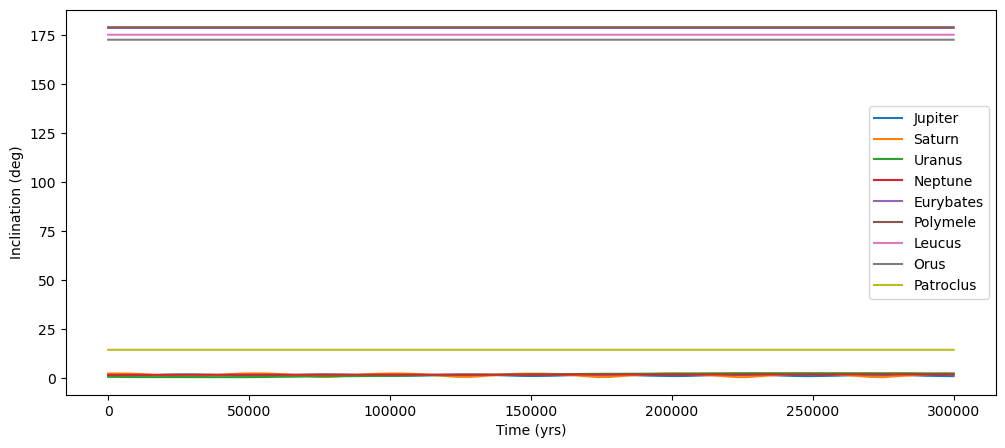

In [19]:
labels = ['Jupiter','Saturn','Uranus','Neptune', 'Eurybates', 'Polymele', 'Leucus', 'Orus', 'Patroclus']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,inc[0],label=labels[0])
plt.plot(times,inc[1],label=labels[1])
plt.plot(times,inc[2],label=labels[2])
plt.plot(times,inc[3],label=labels[3])
plt.plot(times,inc[4],label=labels[4])
plt.plot(times,inc[5],label=labels[5])
plt.plot(times,inc[6],label=labels[6])
plt.plot(times,inc[7],label=labels[7])
plt.plot(times,inc[8],label=labels[8])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Inclination (deg)")
#plt.savefig('eccentricities.png')
plt.legend();

In [28]:
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	4.4.1
REBOUND built on:    	May  7 2024 19:50:41
Number of particles: 	10
Selected integrator: 	mercurius
Simulation time:     	1.0000000000000000e+05
Current timestep:    	1.000000
---------------------------------
<rebound.particle.Particle object at 0x1194a5350, m=39.47841760435743 x=-220.00707149225147 y=211.23365056376352 z=2.948555212660948 vx=-0.004765147691564862 vy=0.003989926472562065 vz=8.630765148355708e-05>
<rebound.particle.Particle object at 0x1194a51d0, m=0.03769743635904807 x=-223.13261686103112 y=207.0408881320301 z=3.0319017791907372 vx=2.134401542488912 vy=-1.710593849618012 vz=-0.039266806910179024>
<rebound.particle.Particle object at 0x1194a5350, m=0.01124986486620411 x=-223.35830378377332 y=202.57852359443945 z=3.2043663145042096 vx=1.8870572213137133 vy=-0.8912652283277129 vz=-0.06546127655850002>
<rebound.particle.Particle object at 0x1194a51d0, m=0.0017186469017235304 x=-230.54975943348265 y=227.96886360